In [2]:
import numpy as np
import pandas as pd
import os
import scipy.io

import matplotlib.pyplot as plt
from scipy import signal

In [2]:
# !pip install mne

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
channel_range = np.array(range(0, 18))
channel_list = ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8','P7','P8','Fz','Cz','Pz']
channel_mymap = dict(zip(channel_list, channel_range))

In [8]:
# Import dfICAFiltered file from AttentionNewDatasetToCSV_ICA_FIltering_doneTOCSV.ipynb
df1 = pd.read_csv('/content/drive/MyDrive/CSVsb4filterADHDAndNon/dfICA_Dataset1NonADHD.csv') 
df1.head()

,Unnamed: 0,A,B,C,D,E,F,G,Label
0,0,-0.000022,0.000082,-0.000083,-0.000018,-0.000035,-0.000030,-0.000084,ADHD
1,1,-0.004436,0.001122,0.001535,-0.000744,0.001502,0.000907,0.000412,ADHD
2,2,-0.004853,0.001032,0.001916,-0.000721,0.001778,0.000736,0.000441,ADHD
3,3,-0.003527,0.000684,0.001818,-0.000257,0.001505,-0.000129,0.000036,ADHD
4,4,-0.003674,0.001123,0.001689,0.000008,0.001540,-0.000573,-0.000295,ADHD


In [22]:
#Drop A due to vsualisation below.
df1 = df1.drop(['A'], axis=1)

In [23]:
df1.shape

(7999921, 8)

In [24]:
df1.drop(['Unnamed: 0'], axis=1)


,B,C,D,E,F,G,Label
0,0.000082,-0.000083,-0.000018,-0.000035,-0.000030,-0.000084,ADHD
1,0.001122,0.001535,-0.000744,0.001502,0.000907,0.000412,ADHD
2,0.001032,0.001916,-0.000721,0.001778,0.000736,0.000441,ADHD
3,0.000684,0.001818,-0.000257,0.001505,-0.000129,0.000036,ADHD
4,0.001123,0.001689,0.000008,0.001540,-0.000573,-0.000295,ADHD
...,...,...,...,...,...,...,...
7999916,0.000050,-0.000486,-0.000157,-0.000168,0.000257,0.000221,ADHD
7999917,0.000198,-0.000363,-0.000347,-0.000099,0.000074,0.000168,ADHD
7999918,0.000247,-0.000521,-0.000390,-0.000222,0.000174,0.000098,ADHD
7999919,0.000189,-0.000595,-0.000210,-0.000303,0.000333,0.000062,ADHD


In [25]:
channel_range = np.array(range(0, 7))
channel_list = ['A','B', 'C', 'D', 'E', 'F', 'G']
channel_mymap = dict(zip(channel_list, channel_range))

In [27]:
datadf2 = np.array(df1)

Text(0, 0.5, 'EEG channel B')

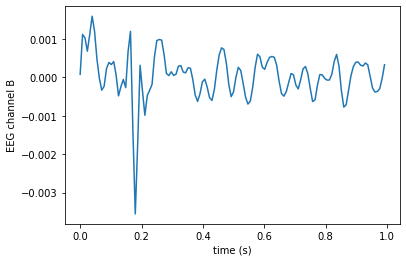

In [29]:
sf=128
i_ch = 1
time = np.arange(128) / sf
channel = datadf2[:128, channel_range[i_ch]]
plt.plot(time, channel)
plt.xlabel('time (s)')
plt.ylabel(f'EEG channel {channel_list[i_ch]}')

In [30]:
states = {
 'Non_ADHD': datadf2[:, :],
}
states.items()

dict_items([('Non_ADHD', array([[0, 8.229449156477319e-05, -8.266014169205183e-05, ...,
        -2.989786254458432e-05, -8.367463217528404e-05, 'ADHD'],
       [1, 0.0011216038310512, 0.0015351726038293, ...,
        0.0009066640549133, 0.000411655548215, 'ADHD'],
       [2, 0.0010323004119678, 0.00191592625107, ..., 0.0007363486138363,
        0.0004413069831544, 'ADHD'],
       ...,
       [7999918, 0.0002471091010949, -0.0005213460447231, ...,
        0.0001737646279586, 9.750610235294402e-05, 'ADHD'],
       [7999919, 0.00018852289747, -0.0005954670806614, ...,
        0.0003327584277439, 6.155868127360372e-05, 'ADHD'],
       [7999920, -3.619256971405389e-05, 1.4991477597325707e-05, ...,
        7.077938292303565e-05, -7.374878200749887e-06, 'ADHD']],
      dtype=object))])

In [31]:
for k,v in states.items():
  print(type(v))
  print(v.shape)

<class 'numpy.ndarray'>
(7999921, 8)


In [32]:
# dfStates = pd.DataFrame.from_dict(states, index=0)
dfStates = pd.DataFrame.from_dict(list(states))
dfStates

,0
0,Non_ADHD


In [ ]:
states.items()

dict_items([('Non_ADHD', array([[0, 2.946026345535406e-05, -4.444958747644818e-05, ...,
        7.85364166973601e-05, 8.512631096460156e-05, 'ADHD'],
       [1, 0.0031826957846098, -0.00205673485467, ...,
        -0.0001658749028776, -0.0006391647042605, 'ADHD'],
       [2, 0.0034514765329517, -0.0018898851707118, ...,
        -0.0001548802053311, -0.0007202161293681, 'ADHD'],
       ...,
       [7999918, -0.0006815438858348, -4.347153694189487e-05, ...,
        0.000115409894421, -9.70737449961583e-05, 'ADHD'],
       [7999919, -0.0004654692715598, -0.000190037131272, ...,
        -8.241155812386155e-05, -5.743335304053674e-05, 'ADHD'],
       [7999920, 1.5694234738241634e-05, -3.225108166090396e-05, ...,
        -7.897210610601311e-05, 8.60445477663404e-06, 'ADHD']],
      dtype=object))])

In [33]:
bands = {'alpha': (8, 13), 'delta': (0.5, 4), 'beta': (13, 30), 'gamma': (30, np.inf)}

In [76]:
def get_powers(channel, sf=128):
    channel = channel - channel.mean()
    freq, psd = signal.periodogram(channel, fs=sf, nfft=256)

    powers = {}
    for band_name, band_limits in bands.items():
        low, high = band_limits
        powers[band_name] = psd[(freq >= low) & (freq < high)].mean().real
    return powers

In [77]:
len(states)

1

In [78]:
subjects = list(range(0,60))

In [79]:
channel_mymap.items()

dict_items([('A', 0), ('B', 1), ('C', 2), ('D', 3), ('E', 4), ('F', 5), ('G', 6)])

In [80]:
len(states)

1

In [81]:
[states.keys()]

[dict_keys(['Non_ADHD'])]

In [68]:
#### subject new case
# Participants were 61 children with ADHD and 60 healthy controls (boys and girls, ages 7-12). 
# The ADHD children were diagnosed by an experienced psychiatrist to DSM-IV criteria, and 
# have taken Ritalin for up to 6 months. None of the children in the control group had a history of 
# psychiatric disorders, epilepsy, or any report of high-risk behaviors.
# 121 total children
# 61 x 1 recording each ADHD - unfocused
# 60 non-adhd or focussed


In [82]:
# df1
listOfRows = []
for subject_idx in subjects:
    #states = get_data(f"eeg_record{subject_idx}.mat")
  for ch_name, ch_idx in channel_mymap.items():
        for state, eeg in states.items():
            powers = get_powers(eeg[:, ch_idx])
            powers['state'] = state
            powers['channel'] = ch_name
            # powers['subject'] = f"subject_{subject_idx}"
            listOfRows.append(powers)

In [86]:
listOfRows[1:2]

[{'alpha': 1.104888805227872e-08,
  'delta': 1.3165975170558085e-08,
  'beta': 8.678286479724255e-09,
  'gamma': 6.36431330446909e-10,
  'state': 'Non_ADHD',
  'channel': 'B'}]

In [87]:
dfrowslist = pd.DataFrame.from_dict(listOfRows)

In [88]:
len(dfrowslist)

420

In [89]:
len(listOfRows )

420

In [90]:
dfrowslist

,alpha,delta,beta,gamma,state,channel
0,1.712614e+01,1.434421e+03,4.729088e+00,1.319146e+00,Non_ADHD,A
1,1.104889e-08,1.316598e-08,8.678286e-09,6.364313e-10,Non_ADHD,B
2,1.084765e-08,2.877318e-08,1.401478e-08,1.298045e-09,Non_ADHD,C
3,4.395662e-09,6.200923e-09,2.715017e-09,1.489624e-10,Non_ADHD,D
4,3.695275e-09,1.269020e-07,1.194078e-09,1.606132e-10,Non_ADHD,E
...,...,...,...,...,...,...
415,1.084765e-08,2.877318e-08,1.401478e-08,1.298045e-09,Non_ADHD,C
416,4.395662e-09,6.200923e-09,2.715017e-09,1.489624e-10,Non_ADHD,D
417,3.695275e-09,1.269020e-07,1.194078e-09,1.606132e-10,Non_ADHD,E
418,1.014609e-08,4.768231e-09,5.773976e-09,3.902922e-10,Non_ADHD,F


In [91]:
dfrowslist = dfrowslist.rename(columns = {'alpha':'Alpha', 'delta':'Delta', 'beta':'Beta','gamma':'Gamma','state':'Label'})

In [92]:
dfrowslist.head()

,Alpha,Delta,Beta,Gamma,Label,channel
0,1.712614e+01,1.434421e+03,4.729088e+00,1.319146e+00,Non_ADHD,A
1,1.104889e-08,1.316598e-08,8.678286e-09,6.364313e-10,Non_ADHD,B
2,1.084765e-08,2.877318e-08,1.401478e-08,1.298045e-09,Non_ADHD,C
3,4.395662e-09,6.200923e-09,2.715017e-09,1.489624e-10,Non_ADHD,D
4,3.695275e-09,1.269020e-07,1.194078e-09,1.606132e-10,Non_ADHD,E


In [93]:
dfrowslist.drop(columns = ['channel']) #ADHD Non_ADHD

,Alpha,Delta,Beta,Gamma,Label
0,1.712614e+01,1.434421e+03,4.729088e+00,1.319146e+00,Non_ADHD
1,1.104889e-08,1.316598e-08,8.678286e-09,6.364313e-10,Non_ADHD
2,1.084765e-08,2.877318e-08,1.401478e-08,1.298045e-09,Non_ADHD
3,4.395662e-09,6.200923e-09,2.715017e-09,1.489624e-10,Non_ADHD
4,3.695275e-09,1.269020e-07,1.194078e-09,1.606132e-10,Non_ADHD
...,...,...,...,...,...
415,1.084765e-08,2.877318e-08,1.401478e-08,1.298045e-09,Non_ADHD
416,4.395662e-09,6.200923e-09,2.715017e-09,1.489624e-10,Non_ADHD
417,3.695275e-09,1.269020e-07,1.194078e-09,1.606132e-10,Non_ADHD
418,1.014609e-08,4.768231e-09,5.773976e-09,3.902922e-10,Non_ADHD


In [94]:
dftoCSVADHD_DS_I=dfrowslist[dfrowslist["Label"] == 'Non_ADHD'] 
dftoCSVADHD_DS_I.replace(to_replace=0,
           value=dfrowslist.mean())

<ipython-input-94-4940002f021c>:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  value=dfrowslist.mean())


,Alpha,Delta,Beta,Gamma,Label,channel
0,1.712614e+01,1.434421e+03,4.729088e+00,1.319146e+00,Non_ADHD,A
1,1.104889e-08,1.316598e-08,8.678286e-09,6.364313e-10,Non_ADHD,B
2,1.084765e-08,2.877318e-08,1.401478e-08,1.298045e-09,Non_ADHD,C
3,4.395662e-09,6.200923e-09,2.715017e-09,1.489624e-10,Non_ADHD,D
4,3.695275e-09,1.269020e-07,1.194078e-09,1.606132e-10,Non_ADHD,E
...,...,...,...,...,...,...
415,1.084765e-08,2.877318e-08,1.401478e-08,1.298045e-09,Non_ADHD,C
416,4.395662e-09,6.200923e-09,2.715017e-09,1.489624e-10,Non_ADHD,D
417,3.695275e-09,1.269020e-07,1.194078e-09,1.606132e-10,Non_ADHD,E
418,1.014609e-08,4.768231e-09,5.773976e-09,3.902922e-10,Non_ADHD,F


In [95]:
dftoCSVADHD_DS_I.drop(columns = ['channel']) 


,Alpha,Delta,Beta,Gamma,Label
0,1.712614e+01,1.434421e+03,4.729088e+00,1.319146e+00,Non_ADHD
1,1.104889e-08,1.316598e-08,8.678286e-09,6.364313e-10,Non_ADHD
2,1.084765e-08,2.877318e-08,1.401478e-08,1.298045e-09,Non_ADHD
3,4.395662e-09,6.200923e-09,2.715017e-09,1.489624e-10,Non_ADHD
4,3.695275e-09,1.269020e-07,1.194078e-09,1.606132e-10,Non_ADHD
...,...,...,...,...,...
415,1.084765e-08,2.877318e-08,1.401478e-08,1.298045e-09,Non_ADHD
416,4.395662e-09,6.200923e-09,2.715017e-09,1.489624e-10,Non_ADHD
417,3.695275e-09,1.269020e-07,1.194078e-09,1.606132e-10,Non_ADHD
418,1.014609e-08,4.768231e-09,5.773976e-09,3.902922e-10,Non_ADHD


In [99]:
# dftoCSVADHD_DS_I.to_csv('/content/drive/MyDrive/CSVsb4filterADHDAndNon/dftoBands_NonADHD_DS_I.csv')
dftoCSVADHD_DS_I.to_csv('/content/drive/MyDrive/NewCSVs_Dataset_I_BandstoPart-III/dftoBands_NonADHD_DS_I.csv')

